# Time Series Traditional Analysis
### Modeling with Moving Average
We'll use the differenced series to model with moving average (MA) and exponential moving average.

In [387]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
from sklearn.metrics import root_mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)

merged_df = pd.read_csv('../data/merged_df.csv', parse_dates=['timestamp'], index_col='timestamp').sort_index().convert_dtypes()
t_df = pd.read_csv('../data/t.csv', parse_dates=['timestamp'], index_col='timestamp').sort_index().convert_dtypes()
v_df = pd.read_csv('../data/v.csv', parse_dates=['timestamp'], index_col='timestamp').sort_index().convert_dtypes()

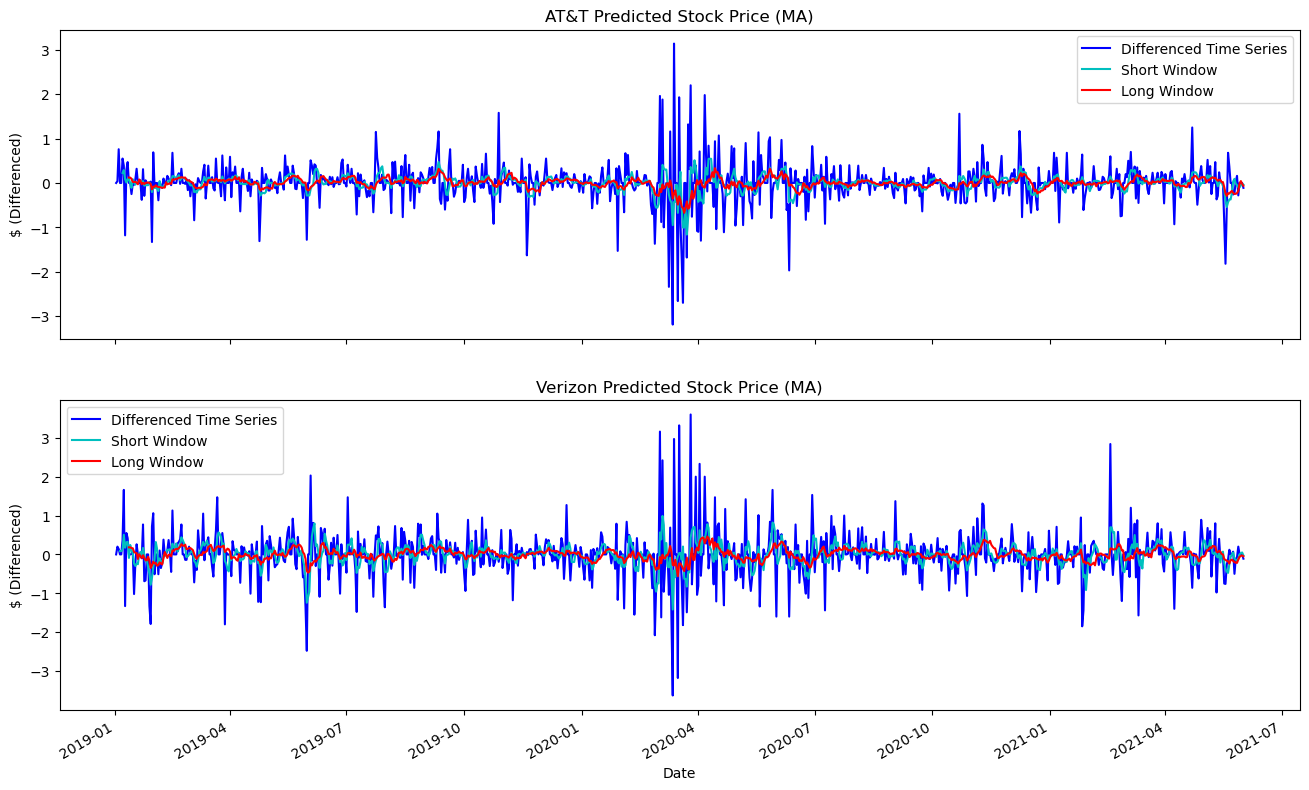

In [388]:
# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 10))

ax1.plot(merged_df.t_diff, label="Differenced Time Series", c="b")
ax1.plot(merged_df.t_diff.rolling(window=6).mean(), label="Short Window", c="c")
ax1.plot(merged_df.t_diff.rolling(window=11).mean(), label="Long Window", c="r")
ax1.legend(loc="best")
ax1.set_title("AT&T Predicted Stock Price (MA)")
ax1.set_xlabel("Date")
ax1.set_ylabel("$ (Differenced)")
ax1.legend()

ax2.plot(merged_df.v_diff, label="Differenced Time Series", c="b")
ax2.plot(merged_df.v_diff.rolling(window=4).mean(), label="Short Window", c="c")
ax2.plot(merged_df.v_diff.rolling(window=11).mean(), label="Long Window", c="r")
ax2.legend(loc="best")
ax2.set_title("Verizon Predicted Stock Price (MA)")
ax2.set_xlabel("Date")
ax2.set_ylabel("$ (Differenced)")
ax2.legend()

fig.autofmt_xdate()
plt.show()

In [389]:
# Calculate the moving average
merged_df = merged_df.assign(t_ma_short = merged_df.t_diff.rolling(window=6).mean())
merged_df = merged_df.assign(t_ma_long = merged_df.t_diff.rolling(window=11).mean())
merged_df = merged_df.assign(v_ma_short = merged_df.v_diff.rolling(window=4).mean())
merged_df = merged_df.assign(v_ma_long = merged_df.v_diff.rolling(window=11).mean())
merged_df = merged_df.fillna(0)

In [390]:
print(f"AT&T Short-Window MA RMSE: {root_mean_squared_error(merged_df.t_diff, merged_df.t_ma_short):.4f}")
print(f"AT&T Long-Window MA RMSE: {root_mean_squared_error(merged_df.t_diff, merged_df.t_ma_long):.4f}")
print(f"Verizon Short-Window MA RMSE: {root_mean_squared_error(merged_df.v_diff, merged_df.v_ma_short):.4f}")
print(f"Verizon Long-Window MA RMSE: {root_mean_squared_error(merged_df.v_diff, merged_df.v_ma_long):.4f}")

AT&T Short-Window MA RMSE: 0.4202
AT&T Long-Window MA RMSE: 0.4415
Verizon Short-Window MA RMSE: 0.5254
Verizon Long-Window MA RMSE: 0.5714


### Modeling with EWM
We'll use the differenced series to model with exponential moving average.

In [391]:
# Calculate the exponential weighted average
merged_df = merged_df.assign(t_ewm_short=merged_df.t_diff.ewm(span=6, adjust=False).mean())
merged_df = merged_df.assign(t_ewm_long=merged_df.t_diff.ewm(span=11, adjust=False).mean())
merged_df = merged_df.assign(v_ewm_short=merged_df.v_diff.ewm(span=4, adjust=False).mean())
merged_df = merged_df.assign(v_ewm_long=merged_df.v_diff.ewm(span=11, adjust=False).mean())

In [392]:
print(f"AT&T Short-Window EWM RMSE: {root_mean_squared_error(merged_df.t_diff, merged_df.t_ewm_short):.4f}")
print(f"AT&T Long-Window EWM RMSE: {root_mean_squared_error(merged_df.t_diff, merged_df.t_ewm_long):.4f}")
print(f"Verizon Short-Window EWM RMSE: {root_mean_squared_error(merged_df.v_diff, merged_df.v_ewm_short):.4f}")
print(f"Verizon Long-Window EWM RMSE: {root_mean_squared_error(merged_df.v_diff, merged_df.v_ewm_long):.4f}")

AT&T Short-Window EWM RMSE: 0.3570
AT&T Long-Window EWM RMSE: 0.4008
Verizon Short-Window EWM RMSE: 0.4077
Verizon Long-Window EWM RMSE: 0.5221


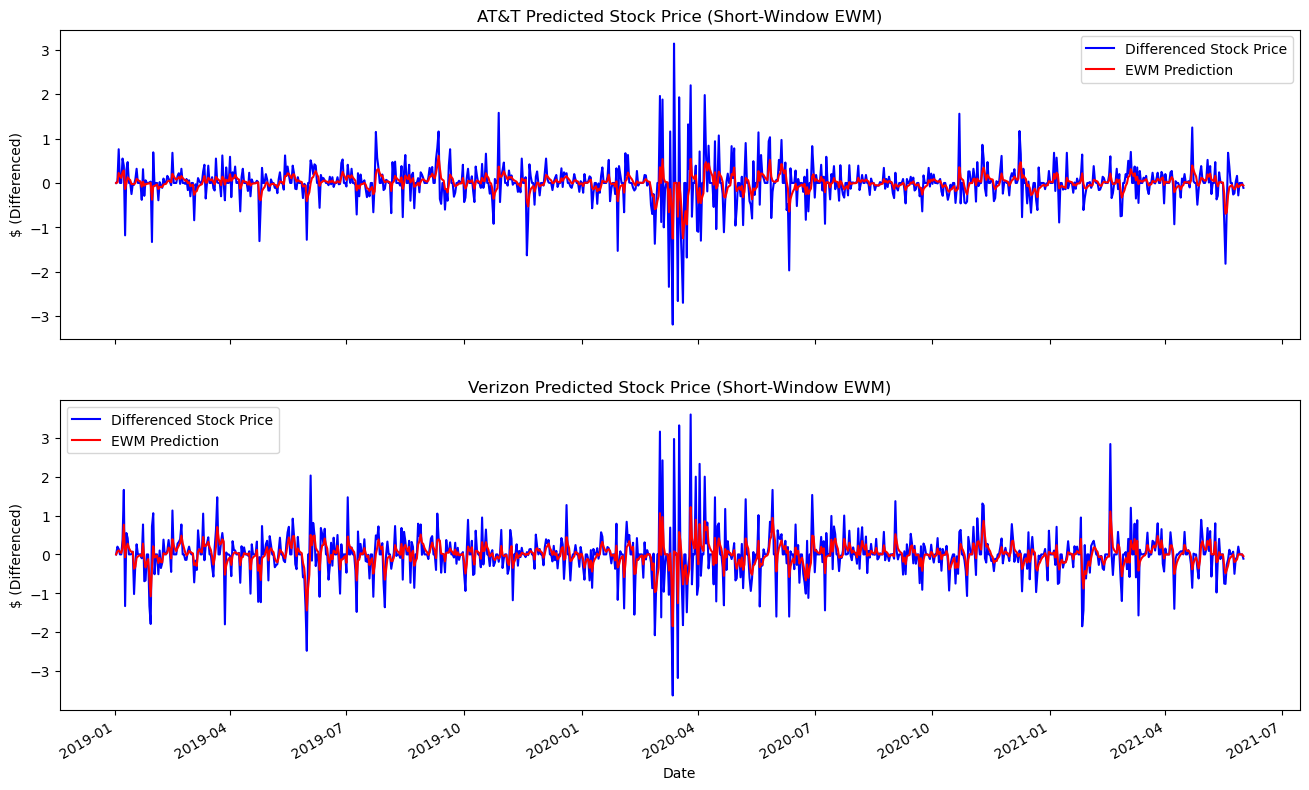

In [393]:
# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 10))


ax1.plot(merged_df['t_diff'], label="Differenced Stock Price", c="b")
ax1.plot(merged_df['t_ewm_short'], c="r", label="EWM Prediction")
ax1.set_title("AT&T Predicted Stock Price (Short-Window EWM)")
ax1.set_xlabel("Date")
ax1.set_ylabel("$ (Differenced)")
ax1.legend()

ax2.plot(merged_df['v_diff'], label="Differenced Stock Price", c="b")
ax2.plot(merged_df["v_ewm_short"], c="r", label="EWM Prediction")
ax2.set_title("Verizon Predicted Stock Price (Short-Window EWM)")
ax2.set_xlabel("Date")
ax2.set_ylabel("$ (Differenced)")
ax2.legend()

fig.autofmt_xdate()
plt.show()

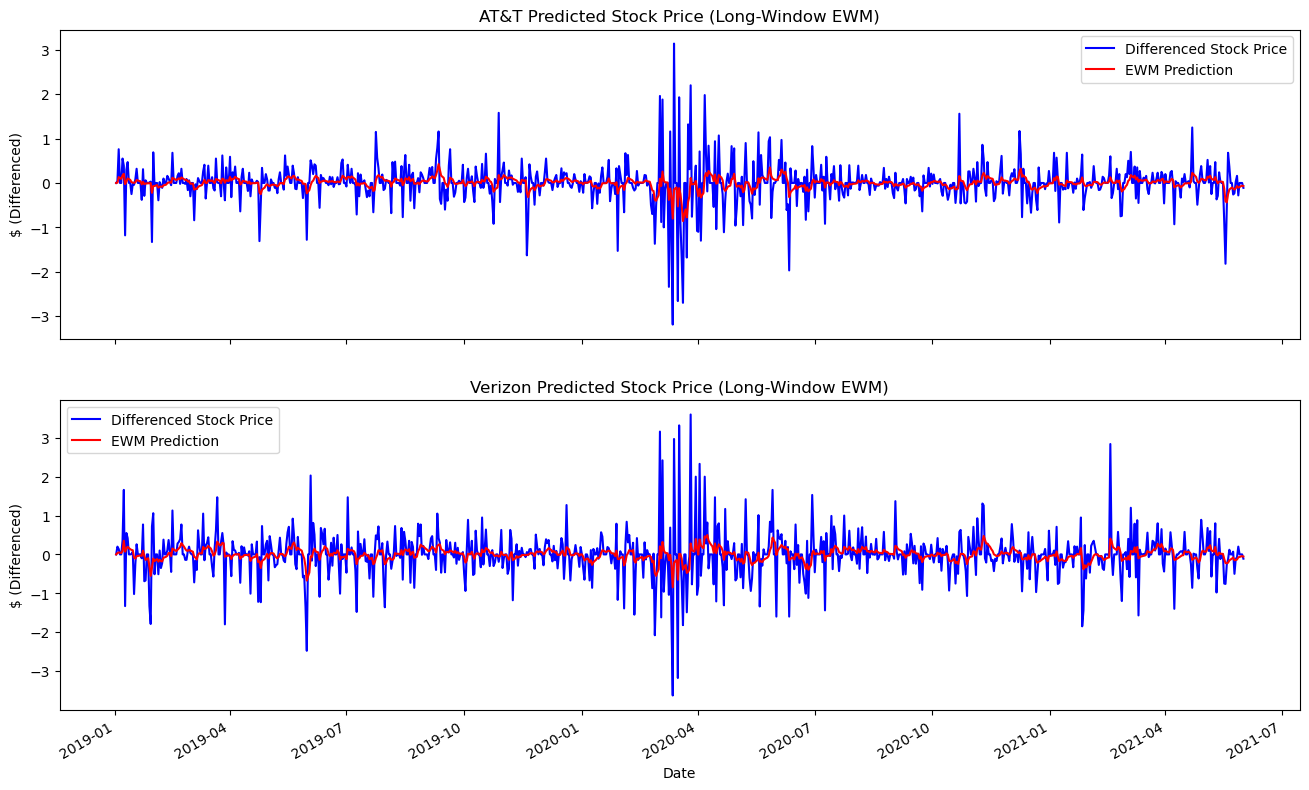

In [394]:
# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 10))


ax1.plot(merged_df["t_diff"], label="Differenced Stock Price", c="b")
ax1.plot(merged_df["t_ewm_long"], c="r", label="EWM Prediction")
ax1.set_title("AT&T Predicted Stock Price (Long-Window EWM)")
ax1.set_xlabel("Date")
ax1.set_ylabel("$ (Differenced)")
ax1.legend()

ax2.plot(merged_df["v_diff"], label="Differenced Stock Price", c="b")
ax2.plot(merged_df["v_ewm_long"], c="r", label="EWM Prediction")
ax2.set_title("Verizon Predicted Stock Price (Long-Window EWM)")
ax2.set_xlabel("Date")
ax2.set_ylabel("$ (Differenced)")
ax2.legend()

fig.autofmt_xdate()
plt.show()

The EWM outperforms the simple moving average because the EWM gives more weight to recent data points while still considering the older data, giving it the ability to reflect changes quickly. 

### Modeling with Autoregressive

In [395]:
# Separating the differenced time series off into their own DataFrames for convenience
t_diff = merged_df.t_diff.asfreq("D")
v_diff = merged_df.v_diff.asfreq("D")

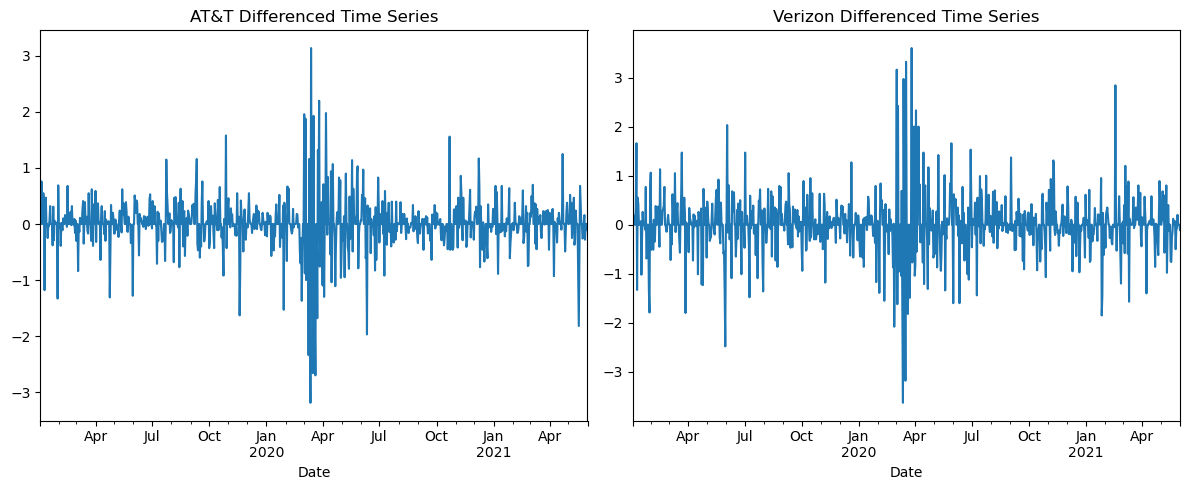

In [396]:
# Let's look at the differenced data.
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot ACF for AT&T Differenced Series
t_diff.plot(title="AT&T Differenced Time Series", ax=ax[0])
ax[0].set_xlabel("Date")

# Plot ACF for Verizon Differenced Series
v_diff.plot(title="Verizon Differenced Time Series", ax=ax[1])
ax[1].set_xlabel("Date")

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

In [397]:
# Let's reconfirm that both time series are stationary using the Augmented Dickey-Fuller test.
t_adf = adfuller(t_diff)
v_adf = adfuller(v_diff)

print(f'AT&T ADF Statistic: {t_adf[0]}')
print(f'AT&T p-value: {t_adf[1]}')
print(f'Verizon ADF Statistic: {v_adf[0]}')
print(f'Verizon p-value: {v_adf[1]}')

AT&T ADF Statistic: -7.6543356110327725
AT&T p-value: 1.7552464348369084e-11
Verizon ADF Statistic: -7.428178984000126
Verizon p-value: 6.465083459795888e-11


Both datasets have ADF p-values << 0.05, so we can reject the null hypothesis and conclude that both datasets are stationary. Let's plot the ACF again to see whether there is autocorrelation.

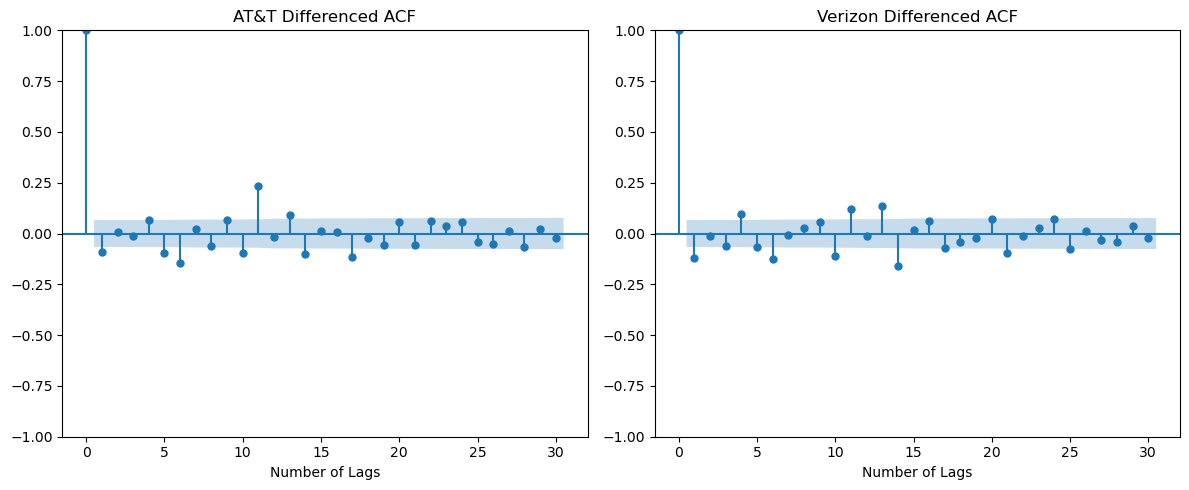

In [398]:
# Plot ACF for the differenced time series
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot ACF for AT&T Differenced Series
plot_acf(t_diff, lags=30, title="AT&T Differenced ACF", ax=ax[0])
ax[0].set_xlabel("Number of Lags")

# Plot ACF for Verizon Differenced Series
plot_acf(v_diff, lags=30, title="Verizon Differenced ACF", ax=ax[1])
ax[1].set_xlabel("Number of Lags")

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

A gradually decreasing ACF plot would suggest an autoregressive model. This isn't exactly the case, but it looks like there isn't a clear MA(q) model either. Let's plot the PACF to see if we can determine the order of the AR model.

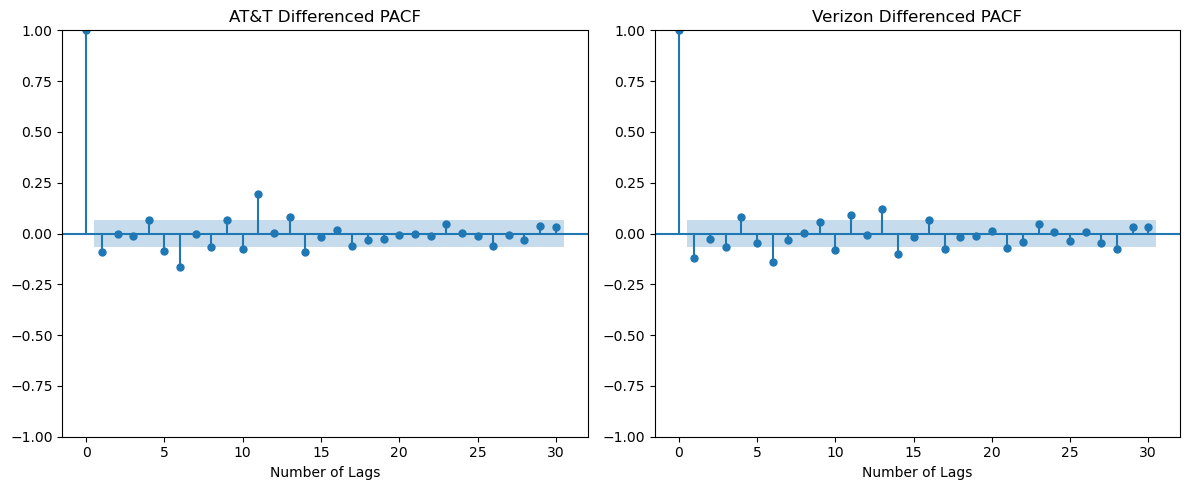

In [399]:
# Plot PACF for the differenced time series
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot ACF for AT&T Differenced Series
plot_pacf(t_diff, lags=30, title="AT&T Differenced PACF", ax=ax[0])
ax[0].set_xlabel("Number of Lags")

# Plot ACF for Verizon Differenced Series
plot_pacf(v_diff, lags=30, title="Verizon Differenced PACF", ax=ax[1])
ax[1].set_xlabel("Number of Lags")

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

This looks like an `AR(1)` or `AR(2)` model for both datasets, though there appears to be some seasonality in both plots. We can look at ARIMA or SARIMA models later to account for this. In the meantime, let's split the data into training and testing sets.

In [400]:
# Splitting the data into training and testing sets
# Make sure both datasets are the same length to use a single split point
assert len(t_diff) == len(v_diff)

# Creating split points to maintain temporal integrity
split_point = int(len(t_diff) * 0.95)

t_train = t_diff.iloc[:split_point]
t_test = t_diff.iloc[split_point:]
v_train = v_diff.iloc[:split_point]
v_test = v_diff.iloc[split_point:]

In [401]:
# Let's check the lengths of the training and testing sets.
print(f'AT&T Training Set Length: {len(t_train)}')
print(f'AT&T Test Set Length: {len(t_test)}')
print(f'Verizon Training Set Length: {len(v_train)}')
print(f'Verizon Test Set Length: {len(v_test)}')

AT&T Training Set Length: 837
AT&T Test Set Length: 45
Verizon Training Set Length: 837
Verizon Test Set Length: 45


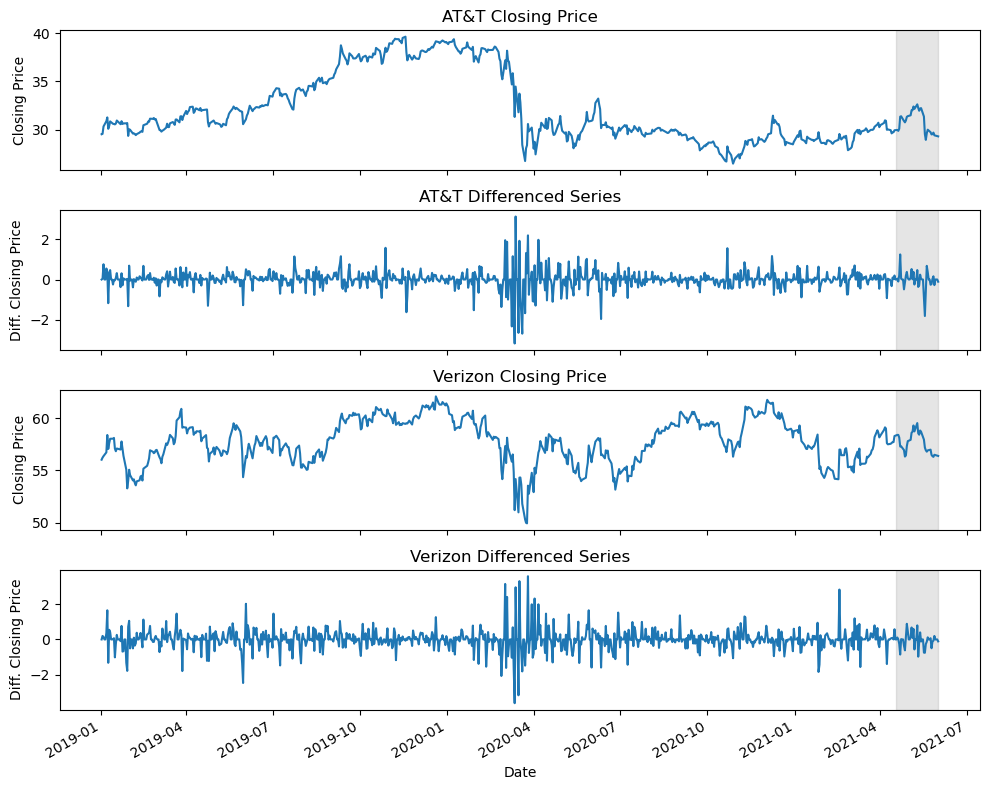

In [402]:
# Let's visualize the testing scenario for AT&T and Verizon.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,
                               figsize=(10, 8))

ax1.plot(t_df.close, label='AT&T Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.axvspan(merged_df['close_t'].index[split_point], t_df.index[-1],
            color='#808080', alpha=0.2)
ax1.set_title('AT&T Closing Price')

ax2.plot(t_diff, label='AT&T Diff. Closing Price')
ax2.set_xlabel('Date')
ax2.set_ylabel('Diff. Closing Price')
ax2.axvspan(t_diff.index[split_point], t_df.index[-1],
            color='#808080', alpha=0.2)
ax2.set_title('AT&T Differenced Series')

ax3.plot(v_df.close, label='Verizon Closing Price')
ax3.set_xlabel('Date')
ax3.set_ylabel('Closing Price')
ax3.axvspan(merged_df['close_v'].index[split_point], v_df.index[-1],
            color='#808080', alpha=0.2)
ax3.set_title('Verizon Closing Price')

ax4.plot(v_diff, label='Verizon Diff. Closing Price')
ax4.set_xlabel('Date')
ax4.set_ylabel('Diff. Closing Price')
ax4.axvspan(v_diff.index[split_point], v_df.index[-1],
            color='#808080', alpha=0.2)
ax4.set_title('Verizon Differenced Series')

fig.autofmt_xdate()
plt.tight_layout()

In [403]:
from statsmodels.tsa.ar_model import AutoReg

# Let's optimize the number of lags using the AIC
def select_lag(series, max_lag):
    aic_values = []
    for lag in range(1, max_lag + 1):
        model = AutoReg(series, lags=lag).fit()
        aic_values.append((lag, model.aic))
    optimal_lag = min(aic_values, key=lambda x: x[1])[0]
    return optimal_lag


In [404]:
optimal_lag_t = select_lag(t_train, max_lag=20)
optimal_lag_v = select_lag(v_train, max_lag=20)

print(f'Optimal AT&T Lag: {optimal_lag_t}')
print(f'Optimal Verizon Lag: {optimal_lag_v}')

t_ar = AutoReg(t_train, lags=optimal_lag_t).fit()
v_ar = AutoReg(v_train, lags=optimal_lag_v).fit()

Optimal AT&T Lag: 14
Optimal Verizon Lag: 17


In [405]:
t_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 t_diff   No. Observations:                  837
Model:                    AutoReg(14)   Log Likelihood                -467.423
Method:               Conditional MLE   S.D. of innovations              0.427
Date:                Sat, 25 Jan 2025   AIC                            966.847
Time:                        15:16:21   BIC                           1042.254
Sample:                    01-16-2019   HQIC                           995.776
                         - 04-17-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.015     -0.068      0.946      -0.030       0.028
t_diff.L1     -0.0964      0.035     -2.776      0.005      -0.164      -0.028
t_diff.L2     -0.0267      0.035     -0.769      0.442      -0.095       0.041
t_diff.L3      0.0439      0.035      1.262      0.207      -0.024       0.112
t_diff.L4      0.0604      0.034      1.771      0.077      -0.006       0.127
t_diff.L5     -0.0661      0.034     -1.938      0.053      -0.133       0.001
t_diff.L6     -0.1639      0.034     -4.807      0.000      -0.231      -0.097
t_diff.L7     -0.0347      0.034     -1.007      0.314      -0.102       0.033
t_diff.L8     -0.0592      0.034     -1.721      0.085      -0.127       0.008
t_diff.L9      0.0623      0.034      1.836      0.066      -0.004       0.129
t_diff.L10    -0.0430      0.034     -1.264      0.206      -0.110       0.024
t_diff.L11     0.2043      0.034      6.011      0.000       0.138       0.271
t_diff.L12     0.0105      0.035      0.302      0.762      -0.057       0.078
t_diff.L13     0.0746      0.035      2.152      0.031       0.007       0.142
t_diff.L14    -0.0863      0.035     -2.497      0.013      -0.154      -0.019
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0229           -0.2970j            1.0651           -0.4550
AR.2            -1.0229           +0.2970j            1.0651            0.4550
AR.3            -0.8578           -0.8195j            1.1863           -0.3786
AR.4            -0.8578           +0.8195j            1.1863            0.3786
AR.5            -0.5266           -1.1595j            1.2735           -0.3179
AR.6            -0.5266           +1.1595j            1.2735            0.3179
AR.7            -0.0505           -1.1310j            1.1322           -0.2571
AR.8            -0.0505           +1.1310j            1.1322            0.2571
AR.9             0.4966           -1.0610j            1.1714           -0.1803
AR.10            0.4966           +1.0610j            1.1714            0.1803
AR.11            0.9321           -0.5841j            1.1000           -0.0891
AR.12            0.9321           +0.5841j            1.1000            0.0891
AR.13            1.2814           -0.0000j            1.2814           -0.0000
AR.14            1.6409           -0.0000j            1.6409           -0.0000
------------------------------------------------------------------------------
"""

In [406]:
v_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 v_diff   No. Observations:                  837
Model:                    AutoReg(17)   Log Likelihood                -697.422
Method:               Conditional MLE   S.D. of innovations              0.566
Date:                Sat, 25 Jan 2025   AIC                           1432.843
Time:                        15:16:21   BIC                           1522.320
Sample:                    01-19-2019   HQIC                          1467.176
                         - 04-17-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.020      0.065      0.948      -0.037       0.040
v_diff.L1     -0.0965      0.035     -2.771      0.006      -0.165      -0.028
v_diff.L2     -0.0242      0.035     -0.692      0.489      -0.093       0.044
v_diff.L3     -0.0553      0.035     -1.585      0.113      -0.124       0.013
v_diff.L4      0.0569      0.035      1.638      0.101      -0.011       0.125
v_diff.L5     -0.0710      0.034     -2.060      0.039      -0.139      -0.003
v_diff.L6     -0.1135      0.035     -3.283      0.001      -0.181      -0.046
v_diff.L7     -0.0336      0.035     -0.970      0.332      -0.102       0.034
v_diff.L8      0.0210      0.035      0.607      0.544      -0.047       0.089
v_diff.L9      0.0413      0.035      1.193      0.233      -0.027       0.109
v_diff.L10    -0.0580      0.035     -1.673      0.094      -0.126       0.010
v_diff.L11     0.0887      0.035      2.566      0.010       0.021       0.156
v_diff.L12     0.0008      0.034      0.024      0.981      -0.067       0.068
v_diff.L13     0.1234      0.034      3.588      0.000       0.056       0.191
v_diff.L14    -0.1077      0.035     -3.114      0.002      -0.175      -0.040
v_diff.L15    -0.0165      0.035     -0.474      0.636      -0.085       0.052
v_diff.L16     0.0615      0.035      1.770      0.077      -0.007       0.130
v_diff.L17    -0.0740      0.035     -2.137      0.033      -0.142      -0.006
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0327           -0.3070j            1.0774           -0.4540
AR.2            -1.0327           +0.3070j            1.0774            0.4540
AR.3            -0.8023           -0.7383j            1.0903           -0.3816
AR.4            -0.8023           +0.7383j            1.0903            0.3816
AR.5            -1.2996           -0.0000j            1.2996           -0.5000
AR.6            -0.4534           -1.0162j            1.1128           -0.3168
AR.7            -0.4534           +1.0162j            1.1128            0.3168
AR.8            -0.0090           -1.0816j            1.0817           -0.2513
AR.9            -0.0090           +1.0816j            1.0817            0.2513
AR.10            1.2224           -0.2039j            1.2393           -0.0263
AR.11            1.2224           +0.2039j            1.2393            0.0263
AR.12            0.9523           -0.6018j            1.1265           -0.0897
AR.13            0.9523           +0.6018j            1.1265            0.0897
AR.14            0.4683           -1.1962j            1.2846           -0.1906
AR.15            0.4683           +1.1962j            1.2846            0.1906
AR.16            0.7199           -1.0488j            1.2720           -0.1543
AR

In [407]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

def rolling_ar_forecast(train, test, lags):
    history = list(train)
    predictions = []

    for t in range(len(test)):
        model = AutoReg(history, lags=lags).fit()
        pred = model.predict(start=len(history), end=len(history))
        predictions.append(pred[0])
        history.append(test.iloc[t])
        
    predictions = pd.Series(predictions, index=test.index)
    rmse = root_mean_squared_error(test, predictions)
    return predictions, rmse


t_predictions, t_rmse = rolling_ar_forecast(t_train, t_test, lags=optimal_lag_t)
v_predictions, v_rmse = rolling_ar_forecast(v_train, v_test, lags=optimal_lag_v)
print(f'AT&T RMSE: {t_rmse:.4f}')
print(f'Verizon RMSE: {v_rmse:.4f}')

AT&T RMSE: 0.4752
Verizon RMSE: 0.4274


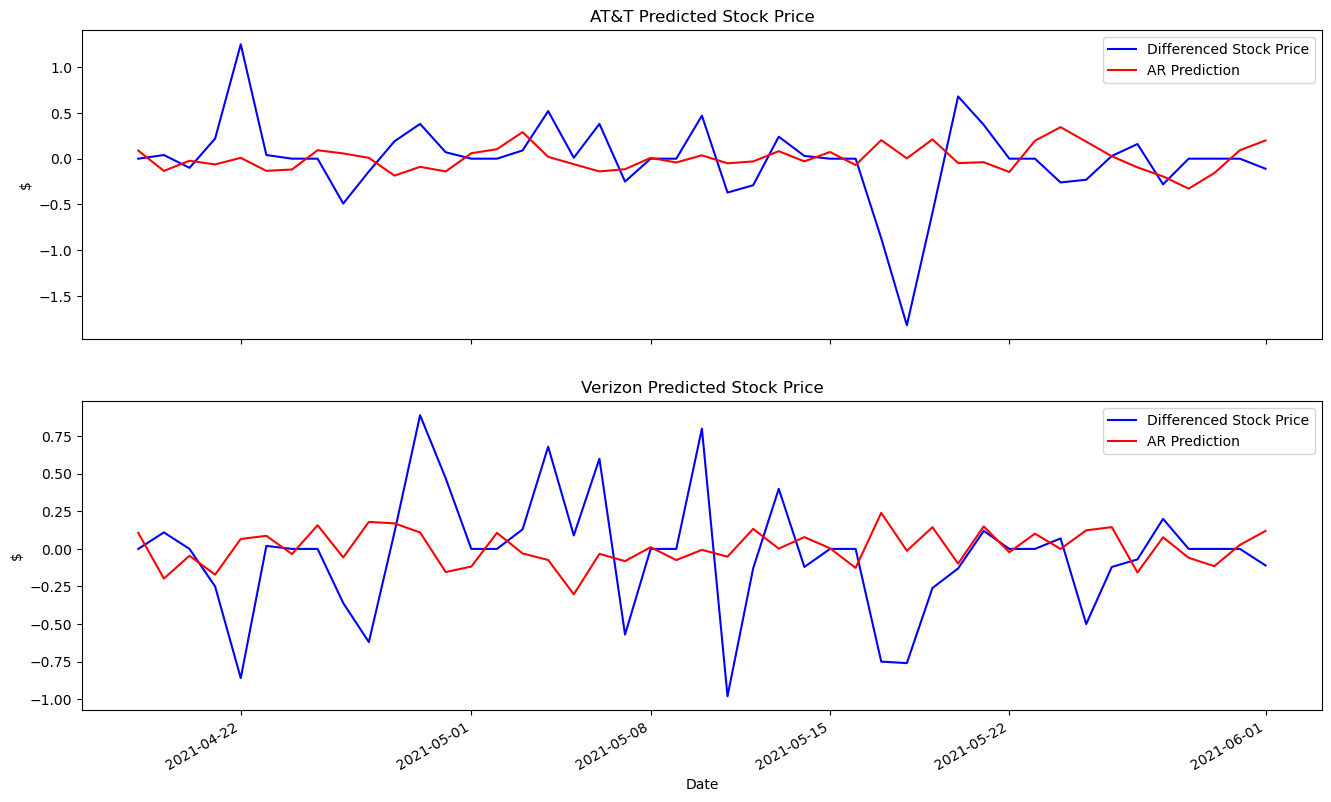

In [408]:
# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 10))


ax1.plot(t_test, label='Differenced Stock Price', c='b')
ax1.plot(t_predictions, c='r', label='AR Prediction')
ax1.set_title('AT&T Predicted Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('$')
ax1.legend()

ax2.plot(v_test, label='Differenced Stock Price', c='b')
ax2.plot(v_predictions, c='r', label='AR Prediction')
ax2.set_title('Verizon Predicted Stock Price')
ax2.set_xlabel('Date')
ax2.set_ylabel('$')
ax2.legend()

fig.autofmt_xdate()
plt.show()

In [409]:
print(f'RMSE of AT&T AR model {t_rolling_ar_rmse:.4f}')
print(f'RMSE of Verizon AR model {v_rolling_ar_rmse:.4f}')

RMSE of AT&T AR model 0.4361
RMSE of Verizon AR model 0.3921


### Modeling with ARIMA (Autoregressive Integrated Moving Average)
We'll use the ARIMA model to forecast the differenced series. The ARIMA model is a generalization of an autoregressive moving average (ARMA) model. It has three components: autoregressive (AR), differencing (I), and moving average (MA). The ARIMA model is suitable for non-stationary data.

In [410]:
# Create new Series with the original closing prices
t_close = merged_df.close_t.asfreq('D')
v_close = merged_df.close_v.asfreq('D')

# Make sure both datasets are the same length to use a single split point
assert len(t_close) == len(v_close)

# Creating split points to maintain temporal integrity
split_point = int(len(t_close) * 0.95)

t_arima_train = t_close.iloc[:split_point]
t_arima_test = t_close.iloc[split_point:]
v_arima_train = v_close.iloc[:split_point]
v_arima_test = v_close.iloc[split_point:]

In [411]:
v_arima_train.describe()

count       837.0
mean     57.78307
std      2.115954
min         49.94
25%         56.45
50%         57.89
75%         59.44
max         62.07
Name: close_v, dtype: Float64

In [412]:
# Define a function that fits many ARIMA(p,d,q) models to the training data and returns the best one.
# Courtesy of Marco Peixeiro's book, "Time Series Forecasting with Python"

from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.arima.model import ARIMA


def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:

    results = []

    for order in tqdm(order_list):
        try:
            model = ARIMA(endog, order=(order[0], d, order[1])).fit(
                method_kwargs={'maxiter': 500})
            aic = model.aic
            results.append([order, aic])
        except Exception as e:
            print(f"Failed to fit model {order}: {str(e)}")
            continue

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(
        by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [413]:
# Define the p and q parameters to take any value between 0 and 10.
from itertools import product
ps = range(0, 3, 1)
qs = range(0, 3, 1)
d = 1
order_list = list(product(ps, qs)) 

In [414]:
t_result_df = optimize_ARIMA(t_arima_train, order_list, d)
v_result_df = optimize_ARIMA(v_arima_train, order_list, d)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [415]:
print(f"Best p, q parameters for AT&T: {t_result_df['(p,q)'].iloc[0]}. AIC: {t_result_df['AIC'].iloc[0]}")
print(f"Best p, q parameters for Verizon: {v_result_df['(p,q)'].iloc[0]}. AIC: {v_result_df['AIC'].iloc[0]}")

Best p, q parameters for AT&T: (2, 2). AIC: 1033.4926415017344
Best p, q parameters for Verizon: (2, 1). AIC: 1503.2944923721002


In [416]:
t_model = ARIMA(t_arima_train, order=(2, 1, 2))
v_model = ARIMA(v_arima_train, order=(2, 1, 1))
t_model_fit = t_model.fit(method_kwargs={'maxiter': 500})
v_model_fit = v_model.fit(method_kwargs={'maxiter': 500})

In [417]:
print(f'AT&T Model Summary:\n {t_model_fit.summary()}\n')
print(f'Verizon Model Summary:\n{v_model_fit.summary()}')

AT&T Model Summary:
                                SARIMAX Results                                
Dep. Variable:                close_t   No. Observations:                  837
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -511.746
Date:                Sat, 25 Jan 2025   AIC                           1033.493
Time:                        15:16:24   BIC                           1057.136
Sample:                    01-02-2019   HQIC                          1042.556
                         - 04-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8265      0.029    -62.618      0.000      -1.884      -1.769
ar.L2         -0.8808      0.029    -30.612      0.000      -0.937      -0.824
ma.L1          1.7634      0.03

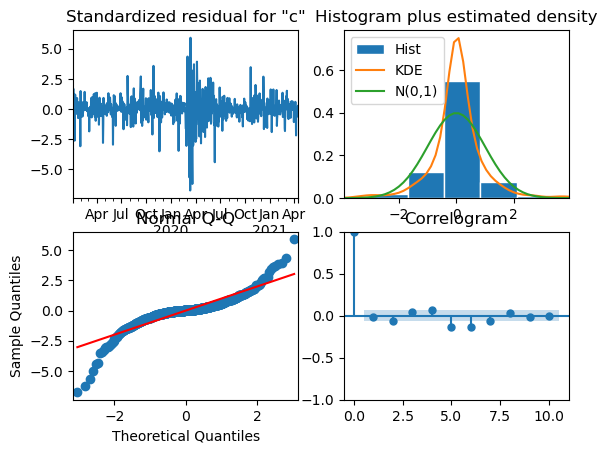

In [418]:
t_model_fit.plot_diagnostics()
plt.show()

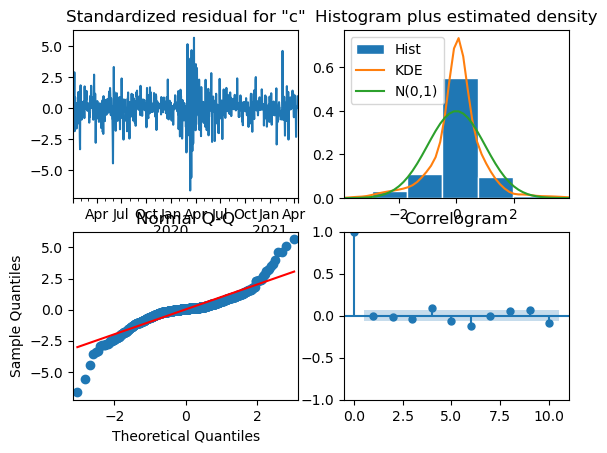

In [419]:
v_model_fit.plot_diagnostics()
plt.show()

In [420]:
# Check the residuals using the Ljung-Box test. 
# If p-values < 0.05, the residuals are not white noise.
from statsmodels.stats.diagnostic import acorr_ljungbox

t_residuals = t_model_fit.resid
v_residuals = v_model_fit.resid

print(f'AT&T Ljung-Box analysis, first 10 residuals:\n {acorr_ljungbox(t_residuals, lags=np.arange(1,11,1).tolist(), return_df=True)}')
print(f'Verizon Ljung-Box analysis, first 10 residuals:\n {acorr_ljungbox(v_residuals, lags=np.arange(1,11,1).tolist(), return_df=True)}')

AT&T Ljung-Box analysis, first 10 residuals:
      lb_stat  lb_pvalue
1   0.000862   0.976573
2   0.114247   0.944478
3   0.171820   0.982005
4   0.263495   0.992047
5   0.281930   0.997969
6   0.349383   0.999220
7   1.910828   0.964610
8   2.000282   0.981003
9   2.146774   0.988928
10  2.146944   0.995085
Verizon Ljung-Box analysis, first 10 residuals:
      lb_stat  lb_pvalue
1   0.006972   0.933457
2   0.007905   0.996055
3   0.015676   0.999480
4   0.069453   0.999411
5   0.069779   0.999933
6   0.308326   0.999456
7   0.597111   0.999008
8   0.701538   0.999523
9   0.854459   0.999706
10  0.885871   0.999902


In [421]:
from statsmodels.tsa.arima.model import ARIMA

def rolling_arima_forecast(train, test, order):
    history = list(train)
    predictions = []

    for t in range(len(test)):
        # Fit ARIMA model on the current history
        model = ARIMA(history, order=order)
        model_fit = model.fit(method_kwargs={"maxiter": 500})

        # Forecast the next value
        forecast = model_fit.forecast()[0]
        predictions.append(forecast)

        # Append the actual value to history for next step
        history.append(test.iloc[t])
    
    rmse = root_mean_squared_error(test, predictions)
    predictions = pd.Series(predictions, index=test.index)
    return predictions, rmse

In [422]:
t_arima_rolling, t_arima_rmse = rolling_arima_forecast(t_arima_train, t_arima_test, (1, 1, 1))
t_arima_2_rolling, t_arima_2_rmse = rolling_arima_forecast(t_arima_train, t_arima_test, (2, 1, 2))
v_arima_rolling, v_arima_rmse = rolling_arima_forecast(v_arima_train, v_arima_test, (1, 1, 1))
v_arima_2_rolling, v_arima_2_rmse = rolling_arima_forecast(v_arima_train, v_arima_test, (2, 1, 1))

In [423]:
print(f'AT&T ARIMA RMSE: {t_arima_rmse:.4f}')
print(f'Verizon ARIMA RMSE: {v_arima_rmse:.4f}')
print(f"AT&T 2nd-order ARIMA RMSE: {t_arima_2_rmse:.4f}")
print(f"Verizon 2nd-order ARIMA RMSE: {v_arima_2_rmse:.4f}")

AT&T ARIMA RMSE: 0.4475
Verizon ARIMA RMSE: 0.3991
AT&T 2nd-order ARIMA RMSE: 0.4402
Verizon 2nd-order ARIMA RMSE: 0.3951


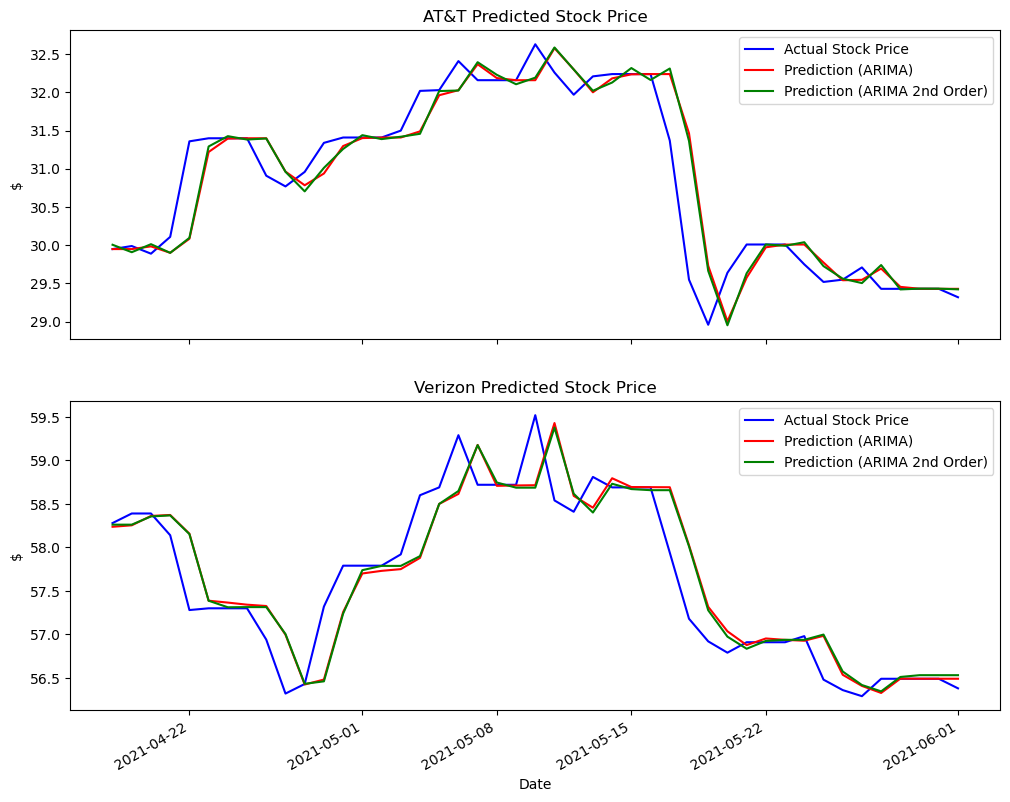

In [424]:
# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))

ax1.plot(t_arima_test, label="Actual Stock Price", c="b")
ax1.plot(t_arima_rolling, c="r", label="Prediction (ARIMA)")
ax1.plot(t_arima_2_rolling, c="g", label="Prediction (ARIMA 2nd Order)")
ax1.set_title("AT&T Predicted Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("$")
ax1.legend(loc="best")

ax2.plot(v_arima_test, label="Actual Stock Price", c="b")
ax2.plot(v_arima_rolling, c="r", label="Prediction (ARIMA)")
ax2.plot(v_arima_2_rolling, c="g", label="Prediction (ARIMA 2nd Order)")
ax2.set_title("Verizon Predicted Stock Price")
ax2.set_xlabel("Date")
ax2.set_ylabel("$")
ax2.legend(loc="best")

fig.autofmt_xdate()
plt.show()

### Modeling with SARIMA (Seasonal ARIMA)
`SARIMAX` models are `Seasonal AutoRegressive Integrated Moving Average` models. They are a generalization of the `ARIMA` models that include seasonality, which should be helpful due to the previously-observed seven-day trends in the data. The workflow for SARIMA models is the same as for ARIMA models, but with an additional step to identify the seasonal order `(P, D, Q, s)`. One does the non-seasonal difference `d` first, then the seasonal difference `D`. Then one plots the ACF and PACF to determine the seasonal order `(P, Q)`. Let's look at using `SARIMA` models to forecast the time series data. 

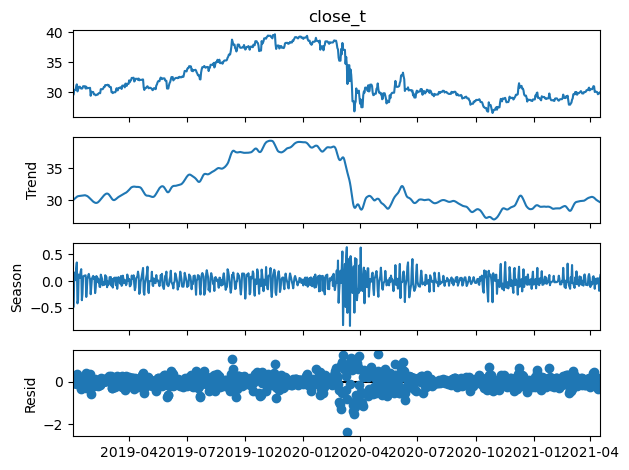

In [475]:
# Perform STL decomposition on the AT&T dataset
t_stl = STL(t_arima_train, period=7)
t_stl = t_stl.fit()

# Plot the decomposition
t_stl.plot()
plt.show()

<Axes: xlabel='timestamp'>

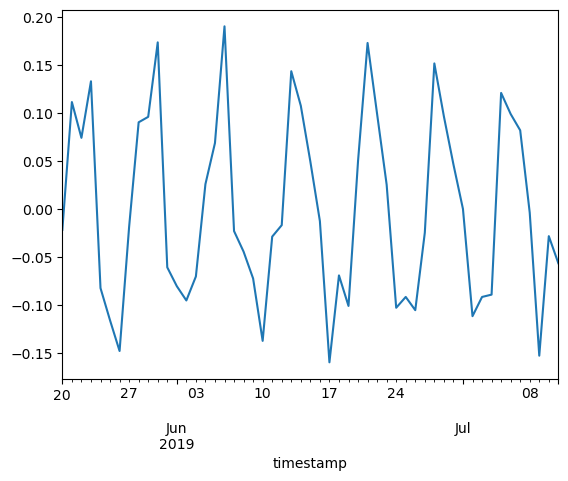

In [476]:
t_stl.seasonal["2019-05-20":"2019-07-11"].plot()

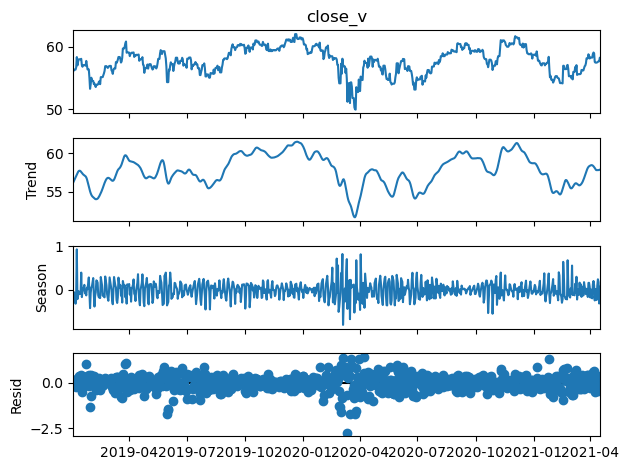

In [477]:
# Perform STL decomposition on the Verizon dataset
v_stl = STL(v_arima_train, period=7)
v_stl = v_stl.fit()

# Plot the decomposition
v_stl.plot()
plt.show()

<Axes: xlabel='timestamp'>

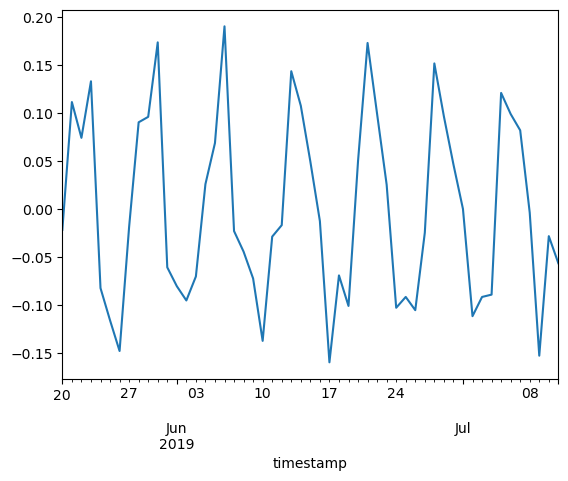

In [478]:
t_stl.seasonal["2019-05-20":"2019-07-11"].plot()

In [431]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from joblib import Parallel, delayed


def optimize_SARIMA_parallelized(
    endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int
) -> pd.DataFrame:

    def fit_order(order):
        try:
            model = SARIMAX(
                endog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False,
            ).fit(disp=False)
            aic = model.aic
            return [order, aic]
        except Exception as e:
            print(f"Failed for order {order}: {e}")
            return None

    results = Parallel(n_jobs=-1)(
        delayed(fit_order)(order)
        for order in tqdm(order_list, desc="Optimizing SARIMA")
    )

    # Remove None results
    results = [r for r in results if r is not None]

    result_df = pd.DataFrame(results, columns=["(p,q,P,Q)", "AIC"])

    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by="AIC", ascending=True).reset_index(drop=True)

    return result_df

In [432]:
# Define the SARIMA parameters
ps = range(0, 3, 1)
qs = range(0, 3, 1)
Ps = range(0, 3, 1)
Qs = range(0, 3, 1)

d = 1
D = 1
s = 7

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

In [433]:
t_sarima_params_df = optimize_SARIMA_parallelized(
    t_arima_train, SARIMA_order_list, d, D, s
)
v_sarima_params_df = optimize_SARIMA_parallelized(
    v_arima_train, SARIMA_order_list, d, D, s
)
print(f"Best AT&T SARIMA parameters: {t_sarima_params_df['(p,q,P,Q)'].iloc[0]}. AIC: {t_sarima_params_df['AIC'].iloc[0]}")
print(f"Best Verizon SARIMA parameters: {v_sarima_params_df['(p,q,P,Q)'].iloc[0]}. AIC: {v_sarima_params_df['AIC'].iloc[0]}")

Optimizing SARIMA:   0%|          | 0/81 [00:00<?, ?it/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0

Optimizing SARIMA:   0%|          | 0/81 [00:00<?, ?it/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
/opt/miniconda3/envs/timeseries/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/timeseries/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/miniconda3/envs/timeseries/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found.

Best AT&T SARIMA parameters: (1, 0, 2, 2). AIC: 1075.0354122024582
Best Verizon SARIMA parameters: (0, 1, 2, 1). AIC: 1517.9983517710575


/opt/miniconda3/envs/timeseries/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


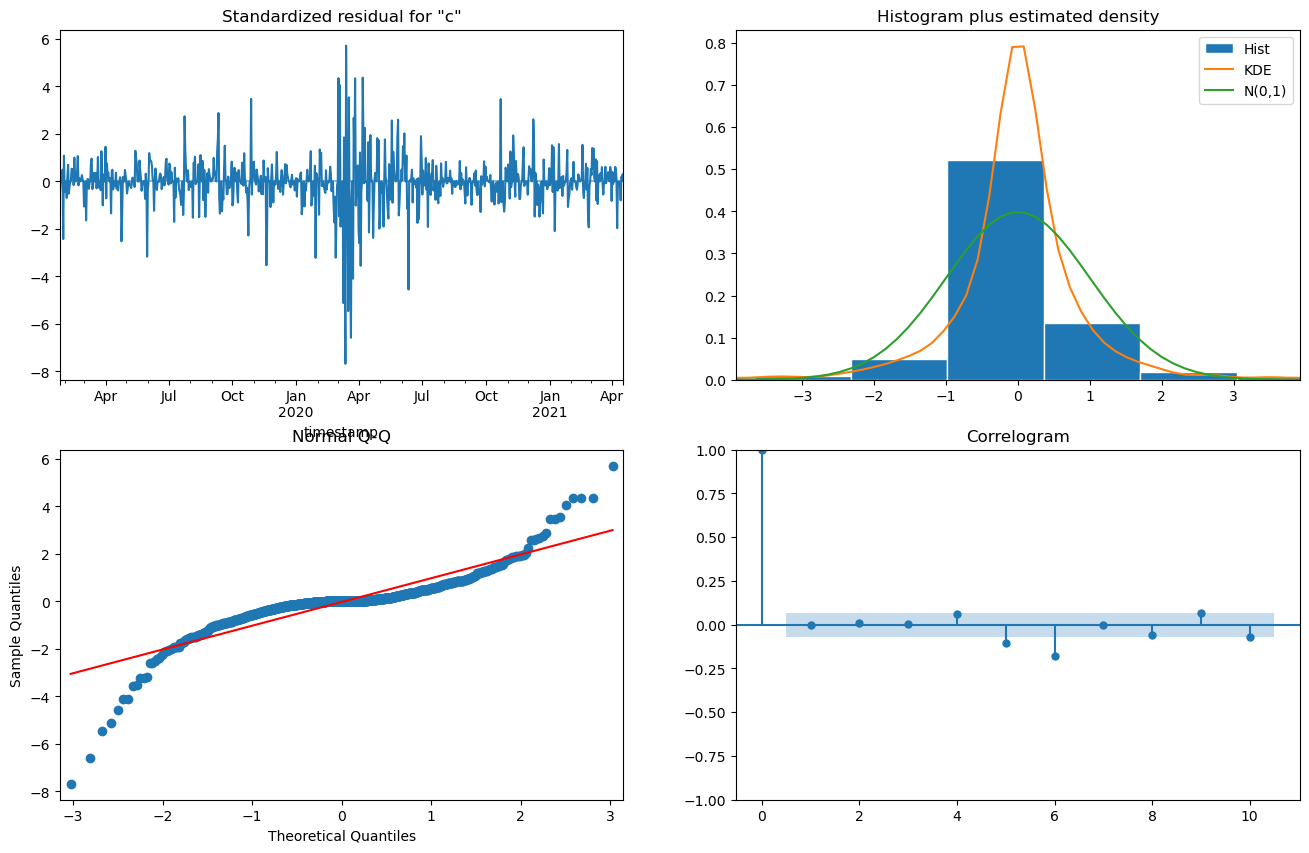

In [507]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming the best parameters are (p, q, P, Q)
best_order_t = t_sarima_params_df["(p,q,P,Q)"].iloc[0]
best_p, best_q, best_P, best_Q = best_order_t
D = 1
s = 7

# Train the SARIMA model with D=1
t_SARIMA_model = SARIMAX(
    t_arima_train,
    order=(best_p, d, best_q),
    seasonal_order=(best_P, D, best_Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False,
)
t_SARIMA_model_fit = t_SARIMA_model.fit(disp=False)

# Diagnostic Plots
t_SARIMA_model_fit.plot_diagnostics(figsize=(16, 10))
plt.show()

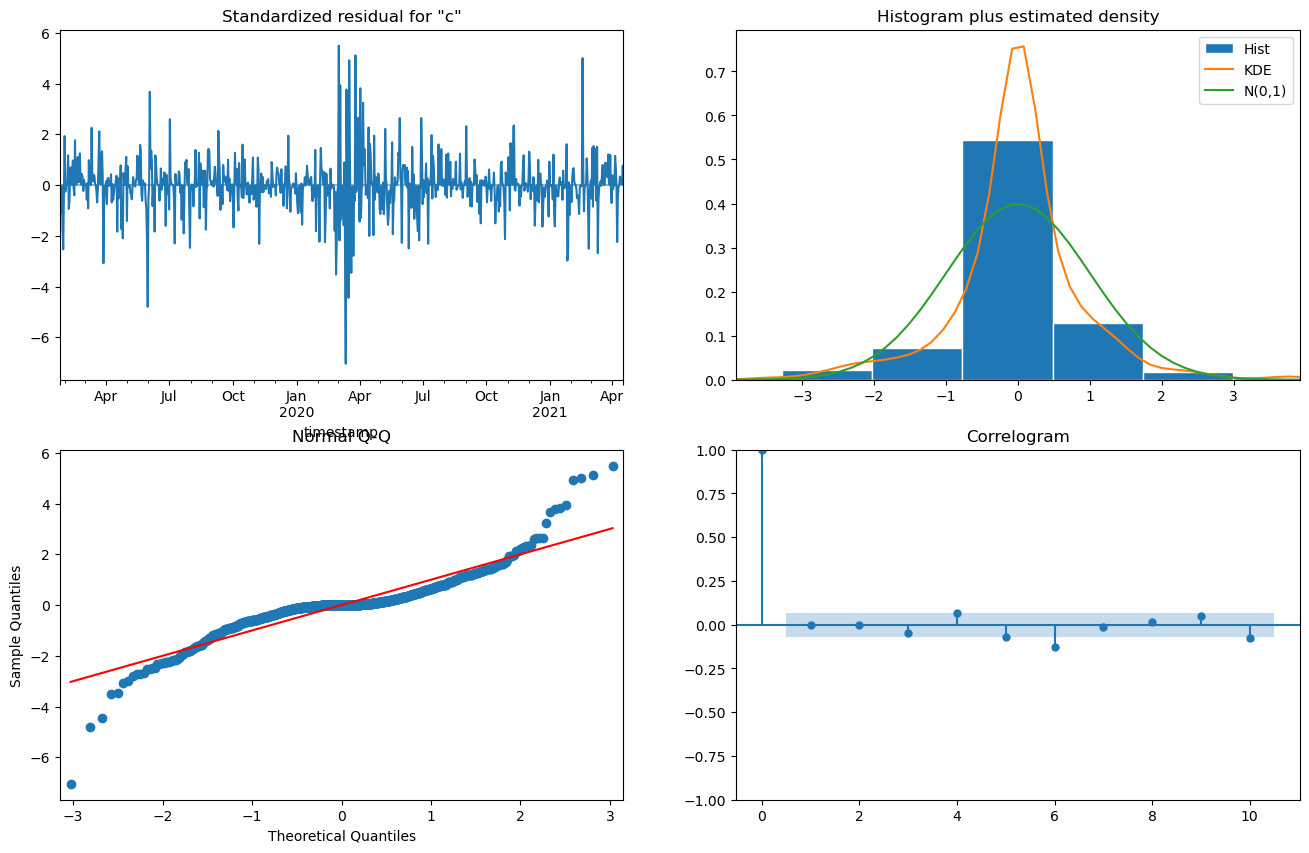

In [508]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming the best parameters are (p, q, P, Q)
best_order_v = v_sarima_params_df["(p,q,P,Q)"].iloc[0]
best_p, best_q, best_P, best_Q = best_order_v
D = 1
s = 7

# Train the SARIMA model with D=1
v_SARIMA_model = SARIMAX(
    v_arima_train,
    order=(best_p, d, best_q),
    seasonal_order=(best_P, D, best_Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False,
)
v_SARIMA_model_fit = v_SARIMA_model.fit(disp=False)

# Diagnostic Plots
v_SARIMA_model_fit.plot_diagnostics(figsize=(16, 10))
plt.show()

In [509]:
# Check the residuals using the Ljung-Box test.
# If p-values < 0.05, the residuals are not white noise.
from statsmodels.stats.diagnostic import acorr_ljungbox

t_sarima_residuals = t_SARIMA_model_fit.resid
v_sarima_residuals = v_SARIMA_model_fit.resid

print(
    f"AT&T Ljung-Box analysis, first 10 residuals:\n {acorr_ljungbox(t_sarima_residuals, lags=np.arange(1,15,1).tolist(), return_df=True)}"
)
print(
    f"Verizon Ljung-Box analysis, first 10 residuals:\n {acorr_ljungbox(v_sarima_residuals, lags=np.arange(1,15,1).tolist(), return_df=True)}"
)

AT&T Ljung-Box analysis, first 10 residuals:
        lb_stat     lb_pvalue
1     1.043564  3.069941e-01
2     1.171060  5.568108e-01
3     1.176361  7.586794e-01
4     1.233768  8.725082e-01
5     1.234004  9.415739e-01
6     1.660835  9.481046e-01
7   118.558155  1.529288e-22
8   119.151313  4.962757e-22
9   119.192851  1.954553e-21
10  119.262830  7.140181e-21
11  119.928102  1.874407e-20
12  120.138268  5.800113e-20
13  120.205112  1.833974e-19
14  120.872257  4.245558e-19
Verizon Ljung-Box analysis, first 10 residuals:
        lb_stat     lb_pvalue
1     0.142830  7.054839e-01
2     0.150909  9.273221e-01
3     0.155175  9.844789e-01
4     0.172498  9.964877e-01
5     0.177167  9.993402e-01
6     0.632584  9.958321e-01
7   171.523897  1.197884e-33
8   171.634702  5.859228e-33
9   171.680777  2.755051e-32
10  171.695820  1.235672e-31
11  171.735272  5.183531e-31
12  171.747216  2.096103e-30
13  171.852652  7.753787e-30
14  172.630272  2.013252e-29


In [439]:
# order = (p, d, q, P, D, Q, s)
def rolling_sarima_forecast(train, test, order):
    history = list(train)
    predictions = []

    for t in range(len(test)):
        # Fit ARIMA model on the current history
        model = SARIMAX(
            history,
            order=(order[0], order[1], order[2]),
            seasonal_order=(order[3], order[4], order[5], order[6]),
            enforce_stationarity=False,
            enforce_invertibility=False,
        )
        model_fit = model.fit(disp=False)

        # Forecast the next value
        forecast = model_fit.forecast()[0]
        predictions.append(forecast)

        # Append the actual value to history for next step
        history.append(test.iloc[t])

    rmse = root_mean_squared_error(test, predictions)
    predictions = pd.Series(predictions, index=test.index)
    return predictions, rmse

In [463]:
t_order = (
    best_order_t[0],
    d,
    best_order_t[1],
    best_order_t[2],
    D,
    best_order_t[3],
    s,
)
v_order = (
    best_order_v[0],
    d,
    best_order_v[1],
    best_order_v[2],
    D,
    best_order_v[3],
    s,
)
t_sarima_rolling, t_sarima_rmse = rolling_sarima_forecast(t_arima_train, t_arima_test, order)
v_sarima_rolling, v_sarima_rmse = rolling_sarima_forecast(v_arima_train, v_arima_test, order)

In [464]:
# (p, d, q, P, D, Q, s)
print(f't_order: {t_order}')
print(f'v_order: {v_order}')

t_order: (1, 1, 0, 2, 1, 2, 7)
v_order: (0, 1, 1, 2, 1, 1, 7)


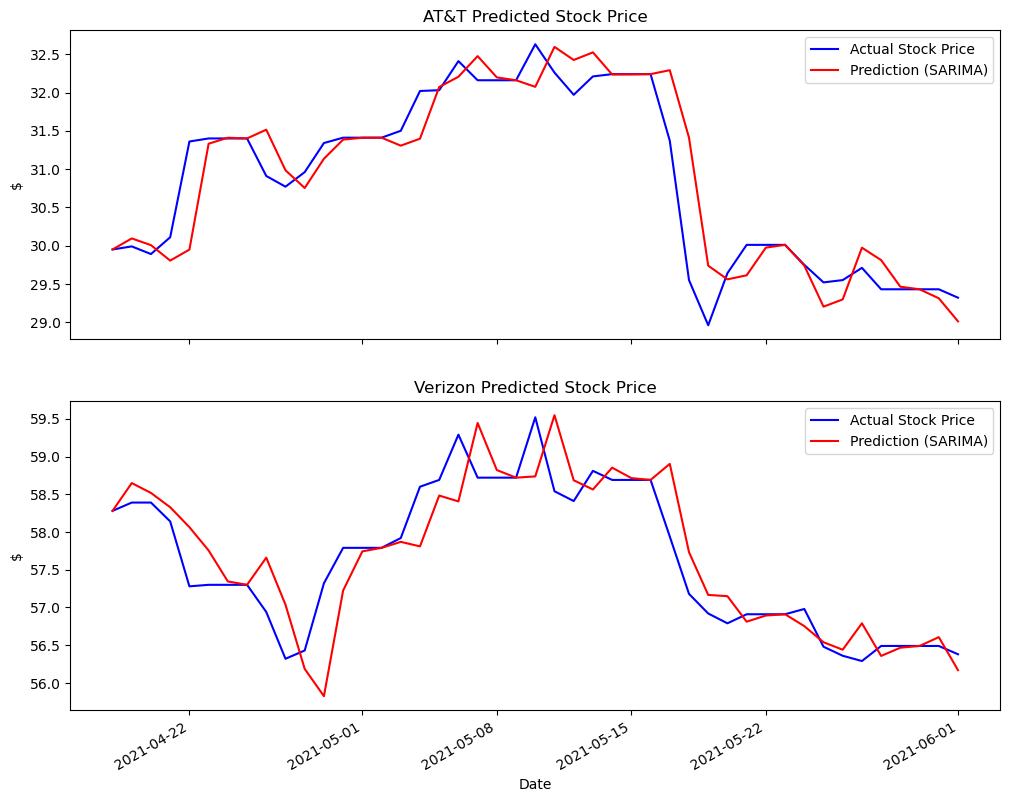

In [465]:
# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))

ax1.plot(t_arima_test, label="Actual Stock Price", c="b")
ax1.plot(t_sarima_rolling, c="r", label="Prediction (SARIMA)")
ax1.set_title("AT&T Predicted Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("$")
ax1.legend(loc="best")

ax2.plot(v_arima_test, label="Actual Stock Price", c="b")
ax2.plot(v_sarima_rolling, c="r", label="Prediction (SARIMA)")
ax2.set_title("Verizon Predicted Stock Price")
ax2.set_xlabel("Date")
ax2.set_ylabel("$")
ax2.legend(loc="best")

fig.autofmt_xdate()
plt.show()

In [435]:
residuals = t_SARIMA_model_fit.resid
ljungbox_results = acorr_ljungbox(residuals, np.arange(1, 11, 1))
print(ljungbox_results)

       lb_stat     lb_pvalue
1     1.043564  3.069941e-01
2     1.171060  5.568108e-01
3     1.176361  7.586794e-01
4     1.233768  8.725082e-01
5     1.234004  9.415739e-01
6     1.660835  9.481046e-01
7   118.558155  1.529288e-22
8   119.151313  4.962757e-22
9   119.192851  1.954553e-21
10  119.262830  7.140181e-21


In [512]:
# The autocorrelated residuals are confounding.
# I could use Fourier terms as exogenous variables, but that may be overkill.
print(f'AT&T SARIMA RMSE: {t_sarima_rmse:.4f}')
print(f'Verizon SARIMA RMSE: {v_sarima_rmse:.4f}')

AT&T SARIMA RMSE: 0.4590
Verizon SARIMA RMSE: 0.4759


### Modeling with `auto_arima`

In [513]:
import pmdarima as pm

## Fit auto_arima for AT&T data
auto_model_t = pm.auto_arima(
    t_arima_train,
    start_p=0,
    start_q=0,
    max_p=3,
    max_q=3,
    start_P=0,
    start_Q=0,
    max_P=3,
    max_Q=3,
    m=7,
    d=1,
    D=1,
    seasonal=True,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

print(auto_model_t.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1619.178, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1435.524, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.94 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1621.169, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1335.977, Time=1.80 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=1291.820, Time=2.06 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=7.10 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=5.24 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=1300.657, Time=0.23 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=1293.630, Time=0.48 sec
 ARIMA(1,1,1)(3,1,0)[7]             : AIC=1293.567, Time=0.81 sec
 ARIMA(0,1,1)(3,1,0)[7]             : AIC=1292.325, Time=0.34 sec
 ARIMA(2,1,1)(3,1,0)[7]             : AIC=1295.598, Time=1.15 sec
 ARIMA(1,1,0)(3,1,0)[7] intercept   : AIC=1293.816, Time=1.05 sec

Best model:  ARIMA(1,1,0)(3,1,0)[7]          
T

In [514]:
# Fit auto_arima for Verizon data
auto_model_v = pm.auto_arima(
    v_arima_train,
    start_p=0,
    start_q=0,
    max_p=3,
    max_q=3,
    start_P=0,
    start_Q=0,
    max_P=3,
    max_Q=3,
    m=7,
    d=1,
    D=1,
    seasonal=True,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

print(auto_model_v.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2085.576, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1917.013, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.79 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2083.108, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1811.209, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=1746.585, Time=0.54 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=3.13 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.66 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=1756.152, Time=0.21 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=1748.148, Time=0.51 sec
 ARIMA(1,1,1)(3,1,0)[7]             : AIC=inf, Time=3.04 sec
 ARIMA(0,1,1)(3,1,0)[7]             : AIC=1746.062, Time=0.38 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=1810.525, Time=0.20 sec
 ARIMA(0,1,1)(3,1,1)[7]             : AIC=inf, Time=5.88 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=inf, Time=3.48 s

In [515]:
att_order = (1, 1, 0, 3, 1, 0, 7)
v_order = (0, 1, 1, 3, 1, 0, 7)
t_pdarima_rolling, t_pdarima_rmse = rolling_sarima_forecast(
    t_arima_train, t_arima_test, order
)
v_pdarima_rolling, v_pdarima_rmse = rolling_sarima_forecast(
    v_arima_train, v_arima_test, order
)
print(f'Auto-ARIMA RMSE for AT&T: {t_pdarima_rmse:.4f}')
print(f'Auto-ARIMA RMSE for Verizon: {v_pdarima_rmse:.4f}')

Auto-ARIMA RMSE for AT&T: 0.4590
Auto-ARIMA RMSE for Verizon: 0.4759


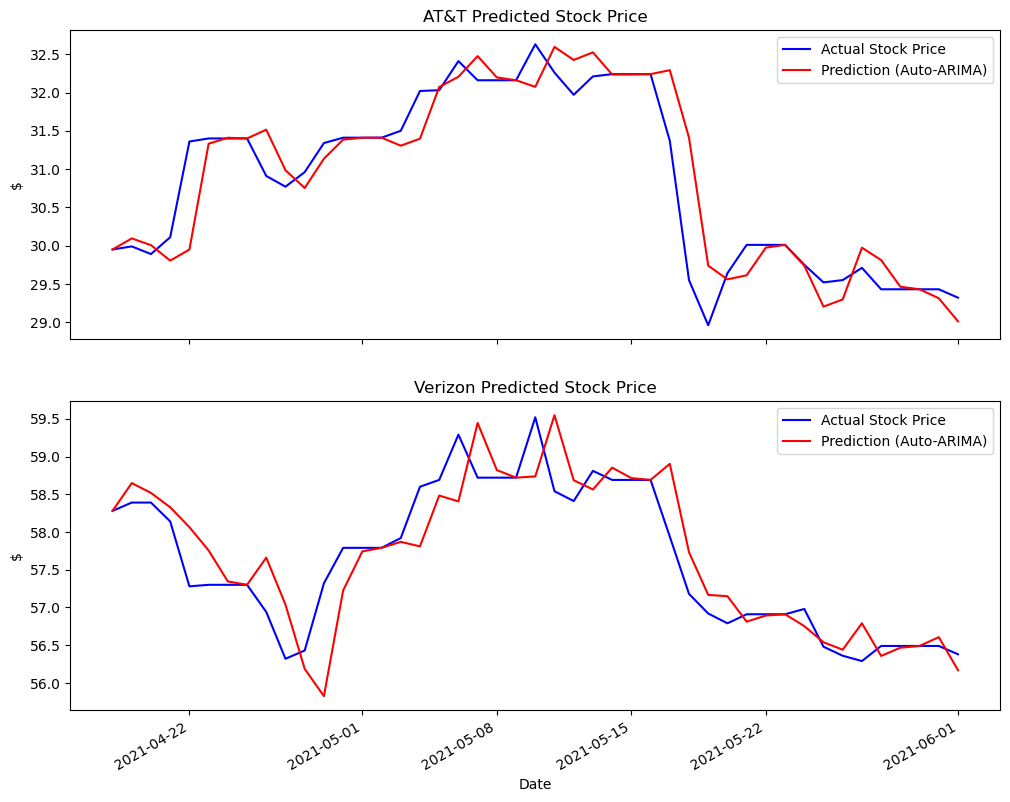

In [516]:
# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))

ax1.plot(t_arima_test, label="Actual Stock Price", c="b")
ax1.plot(t_pdarima_rolling, c="r", label="Prediction (Auto-ARIMA)")
ax1.set_title("AT&T Predicted Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("$")
ax1.legend(loc="best")

ax2.plot(v_arima_test, label="Actual Stock Price", c="b")
ax2.plot(v_pdarima_rolling, c="r", label="Prediction (Auto-ARIMA)")
ax2.set_title("Verizon Predicted Stock Price")
ax2.set_xlabel("Date")
ax2.set_ylabel("$")
ax2.legend(loc="best")

fig.autofmt_xdate()
plt.show()